### Data Exploration

In [1]:
import numpy as nparam 

import pandas as pdparam 

import matplotlib.pyplot as pltparam 

import seaborn as snsparam 

from sklearn.metrics import confusion_matrix,classification_report 

import time 

import warnings 

warnings.filterwarnings("ignore")

### Import the data

In [3]:
mydf= pdparam.read_csv("C:/Users/91989/Desktop/research_presentation/Liver Patient Dataset (LPD)_train.csv",encoding='unicode_escape') 

mydf.head() 

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [5]:
#change column names
x=["age",'gender','tot_bil','dir_bil','alk_phos','sgpt_amino','sgot_amino','tot_proteins','albumin','alb_ratio','result'] 

mydf.columns=x 

mydf.isnull().sum() #check missing values 

mydf.info() #check nature of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           30689 non-null  float64
 1   gender        29789 non-null  object 
 2   tot_bil       30043 non-null  float64
 3   dir_bil       30130 non-null  float64
 4   alk_phos      29895 non-null  float64
 5   sgpt_amino    30153 non-null  float64
 6   sgot_amino    30229 non-null  float64
 7   tot_proteins  30228 non-null  float64
 8   albumin       30197 non-null  float64
 9   alb_ratio     30132 non-null  float64
 10  result        30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


In [4]:
df.columns=x

In [5]:
df.isnull().sum() #check missing values

age               2
gender          902
tot_bil         648
dir_bil         561
alk_phos        796
sgpt_amino      538
sgot_amino      462
tot_proteins    463
albumin         494
alb_ratio       559
result            0
dtype: int64

In [6]:
df.info() #check nature of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           30689 non-null  float64
 1   gender        29789 non-null  object 
 2   tot_bil       30043 non-null  float64
 3   dir_bil       30130 non-null  float64
 4   alk_phos      29895 non-null  float64
 5   sgpt_amino    30153 non-null  float64
 6   sgot_amino    30229 non-null  float64
 7   tot_proteins  30228 non-null  float64
 8   albumin       30197 non-null  float64
 9   alb_ratio     30132 non-null  float64
 10  result        30691 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.6+ MB


<Axes: >

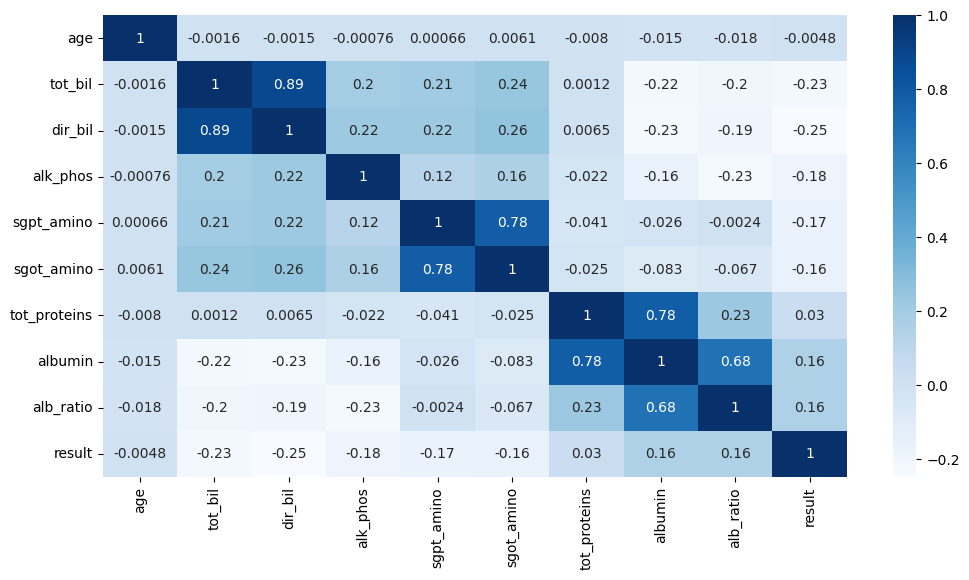

In [8]:
pltparam.figure(figsize=(12,6)) 

snsparam.heatmap(mydf.corr(numeric_only=True),annot=True,cmap="Blues") 

In [9]:
mydf=mydf.drop_duplicates() 

In [9]:
df

,age,gender,tot_bil,dir_bil,alk_phos,sgpt_amino,sgot_amino,tot_proteins,albumin,alb_ratio,result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
29974,58.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1


### Data Visualization

<Axes: xlabel='result', ylabel='count'>

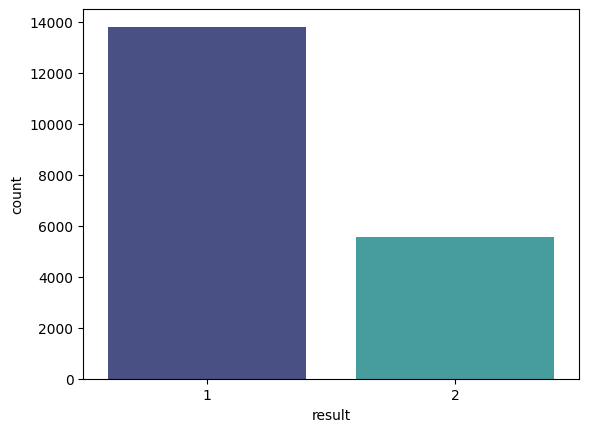

In [10]:
snsparam.countplot(data=mydf, x = 'result', label='Count',palette='mako') 

<Axes: xlabel='result', ylabel='count'>

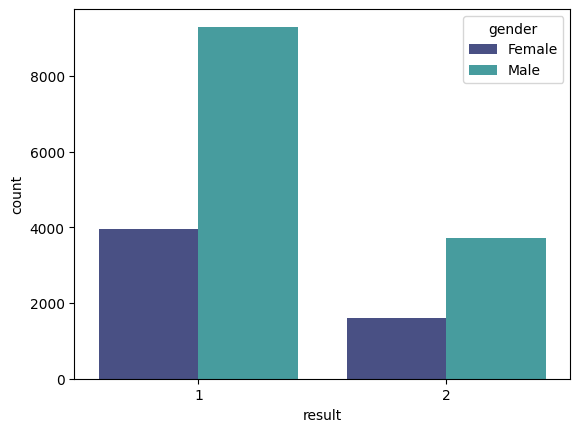

In [11]:
sns.countplot(data=df, x = 'result', hue="gender",palette='mako')

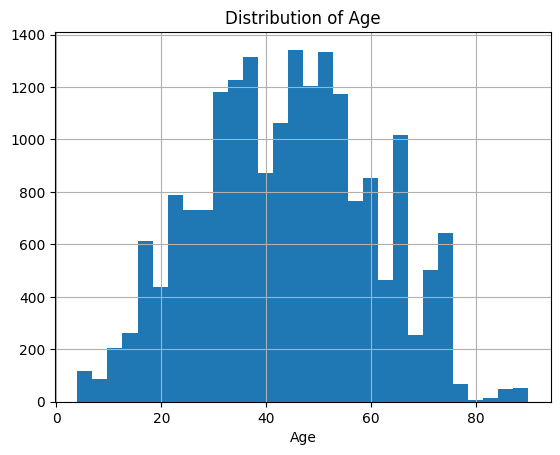

In [12]:
df['age'].hist(bins=30)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

Text(0.5, 0.98, 'Alkphos Alkaline Phosphotase by Gender')

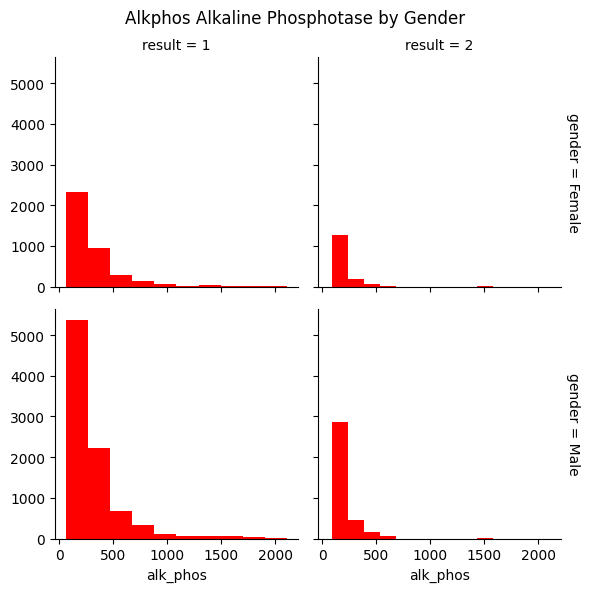

In [13]:
#alk_phos by gender
g = sns.FacetGrid(df, col="result", row="gender", margin_titles=True)
g.map(plt.hist, "alk_phos", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Alkphos Alkaline Phosphotase by Gender')

In [1]:
#alk_phos by gender
g = sns.FacetGrid(df, col="result", row="gender", margin_titles=True)
g.map(plt.hist, "dir_bil", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Direct Bilirubin by Gender')

NameError: name 'sns' is not defined

Text(0.5, 0.98, 'Albumin by Gender')

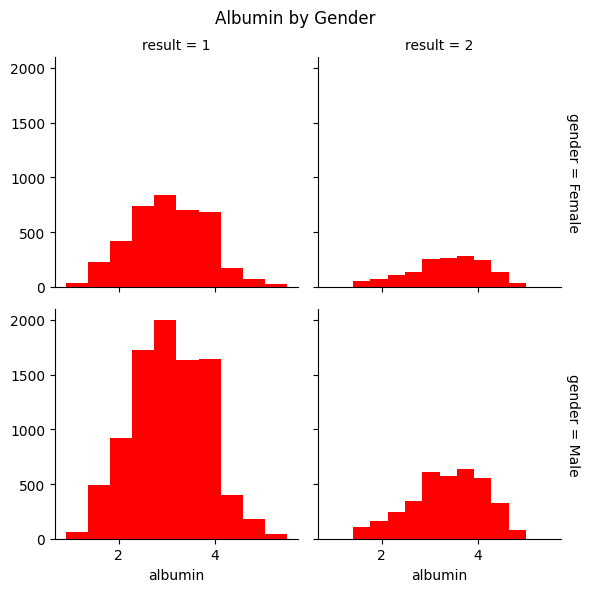

In [15]:
#alk_phos by gender
g = sns.FacetGrid(df, col="result", row="gender", margin_titles=True)
g.map(plt.hist, "albumin", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Albumin by Gender')

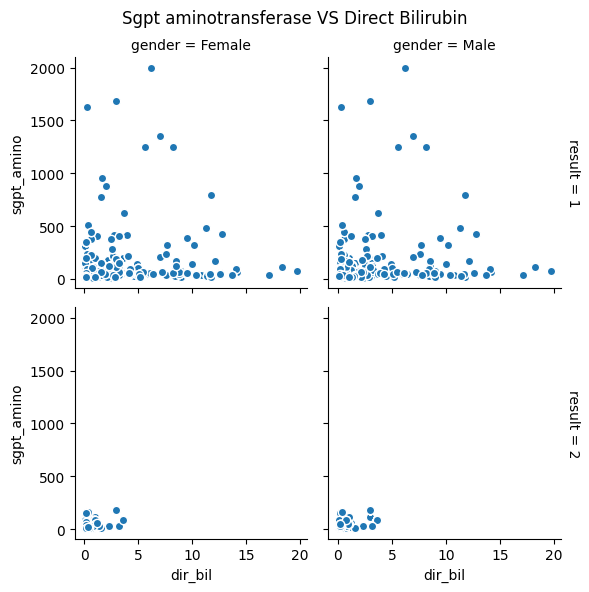

In [16]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"dir_bil", "sgpt_amino", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sgpt aminotransferase VS Direct Bilirubin')
plt.show()

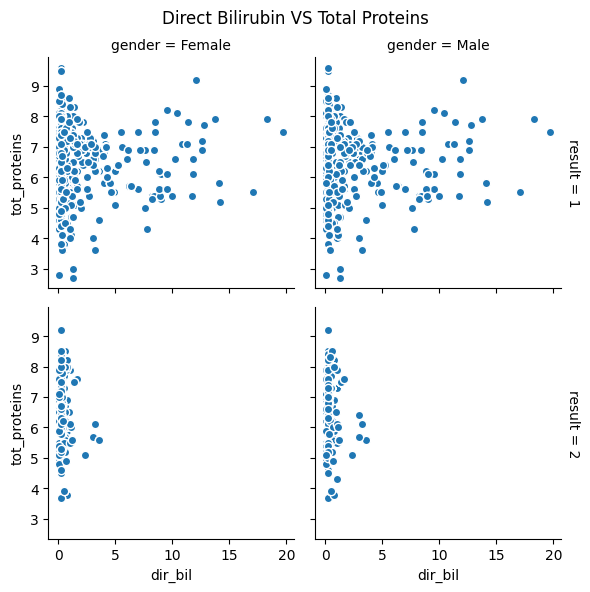

In [17]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"dir_bil", "tot_proteins", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Direct Bilirubin VS Total Proteins')
plt.show()

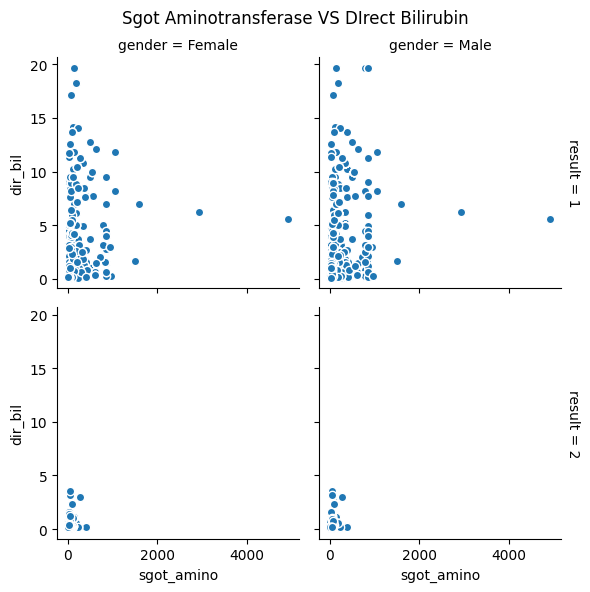

In [18]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"sgot_amino", "dir_bil", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sgot Aminotransferase VS DIrect Bilirubin')
plt.show()

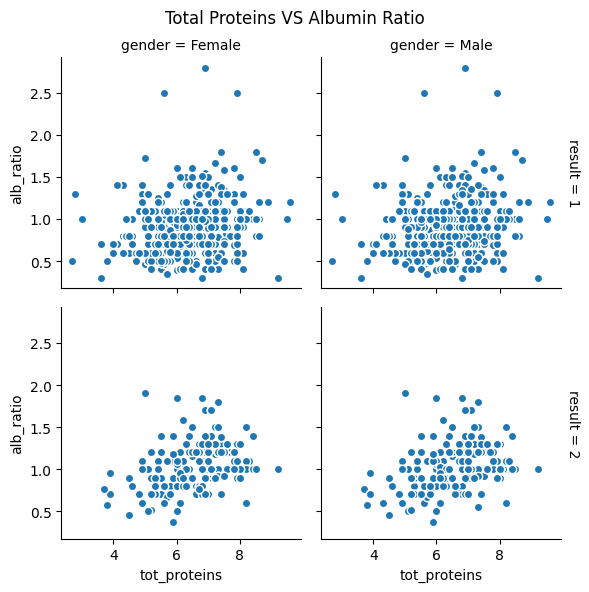

In [19]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"tot_proteins", "alb_ratio", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Proteins VS Albumin Ratio')
plt.show()

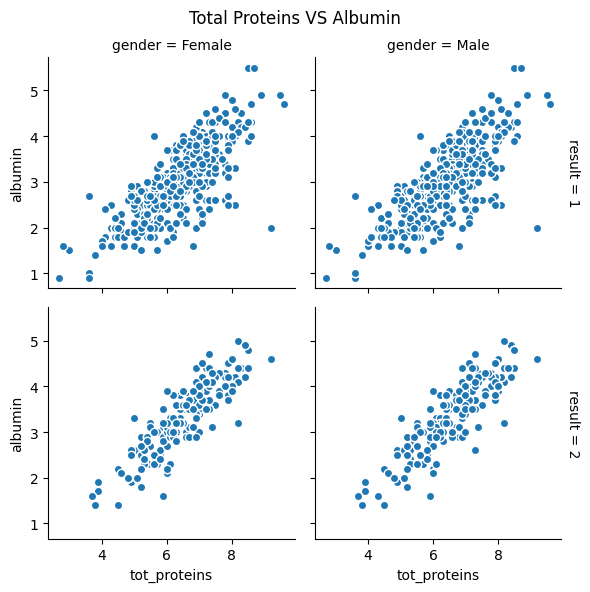

In [20]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"tot_proteins", "albumin", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Proteins VS Albumin')
plt.show()

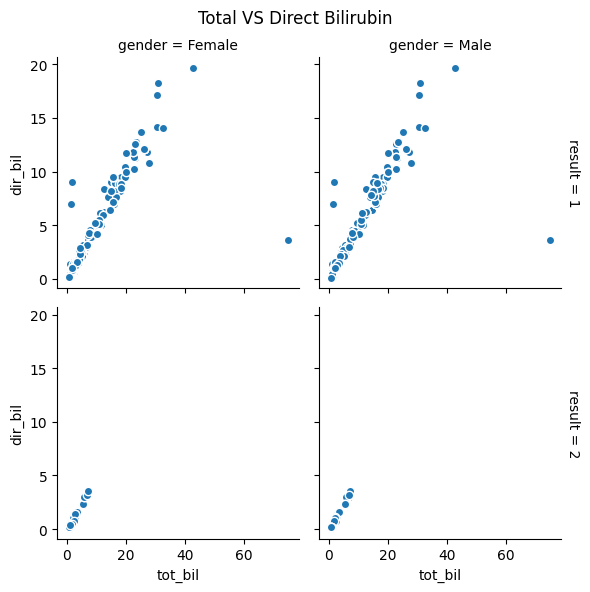

In [21]:
g = sns.FacetGrid(df, col="gender", row="result", margin_titles=True)
g.map(plt.scatter,"tot_bil", "dir_bil", edgecolor="w")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total VS Direct Bilirubin')
plt.show()

In [11]:
#Dropping missing vlues
mydf=mydf.dropna() 

In [23]:
df.shape

(16389, 11)

### Label Encoding using label encoder

In [12]:
cat_list = (mydf.dtypes == 'object') 

discrete_cols= list(cat_list[cat_list].index) 

In [13]:
from sklearn import preprocessing 

cat_encoder = preprocessing.OrdinalEncoder() 

In [14]:
mydf[discrete_cols] = cat_encoder.fit_transform(mydf[discrete_cols]) 

### Splitting the Data

In [15]:
X=mydf.drop(labels=['result'],axis=1) 

y=mydf['result'] 

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier 

rfc=RandomForestClassifier() 

time_beg = time.perf_counter() 

rfc.fit(X_train,y_train) 

print(time.perf_counter() - time_beg, "seconds") 

pred_rfc=rfc.predict(X_test) 

pred_prob_rfc_tr=rfc.predict_proba(X_train)[::,1] 

pred_prob_rfc_val=rfc.predict_proba(X_test)[::,1] 

from sklearn.metrics import roc_auc_score 

auc_score_rfc = roc_auc_score(y_train, pred_prob_rfc_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_rfc)) 

from sklearn.metrics import roc_auc_score 

auc_score_rfc = roc_auc_score(y_test, pred_prob_rfc_val) 

print('AUC score in test data is : {:.4f}'.format(auc_score_rfc)) 

2.2196098999120295 seconds
AUC score in train data is : 1.0000
AUC score in test data is : 0.9994


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2370
           2       1.00      1.00      1.00       908

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



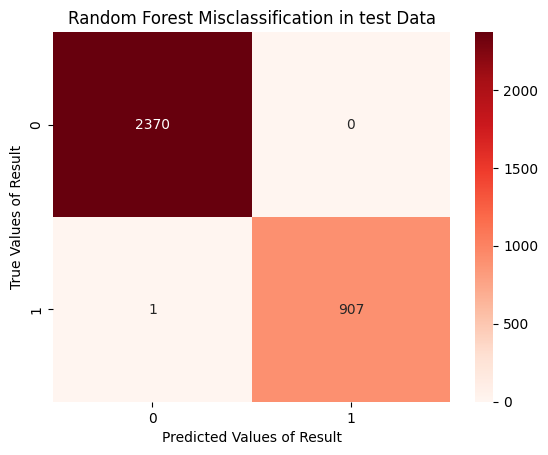

In [17]:
ax=snsparam.heatmap(confusion_matrix(y_test,pred_rfc),annot=True,fmt="d",cmap="Reds") 

ax.set_ylim(2.0, 0)  

  

pltparam.title("Random Forest Misclassification in test Data") 

pltparam.ylabel("True Values of Result") 

pltparam.xlabel("Predicted Values of Result") 

print(classification_report(y_test,pred_rfc)) 

In [30]:
pred_rf=rf.predict(X_test)

In [31]:
pred_prob_rf_tr=rf.predict_proba(X_train)[::,1]
pred_prob_rf_val=rf.predict_proba(X_test)[::,1]

In [32]:
from sklearn.metrics import roc_auc_score
auc_score_rf = roc_auc_score(y_train, pred_prob_rf_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_rf))

AUC score in train data is : 1.0000


In [33]:
from sklearn.metrics import roc_auc_score
auc_score_rf = roc_auc_score(y_test, pred_prob_rf_val)
print('AUC score in test data is : {:.4f}'.format(auc_score_rf))

AUC score in test data is : 1.0000


Text(0.5, 23.52222222222222, 'Predicted Values of Result')

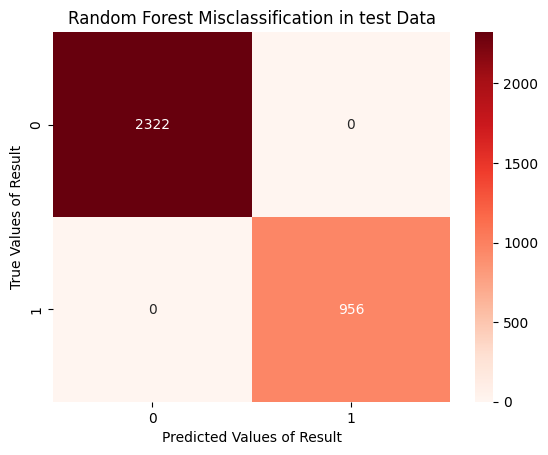

In [34]:
#confusion matrix
ax=sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,fmt="d",cmap="Reds")
ax.set_ylim(2.0, 0) 

plt.title("Random Forest Misclassification in test Data")
plt.ylabel("True Values of Result")
plt.xlabel("Predicted Values of Result")

In [35]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2322
           2       1.00      1.00      1.00       956

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



### XGBoost Classifier

In [19]:
from xgboost import XGBClassifier 

xgbc=XGBClassifier() 

time_beg = time.perf_counter() 

xgbc.fit(X_train,y_train) 

print(time.perf_counter() - time_beg, "seconds") 

pred_xg=xgbc.predict(X_test) 

pred_prob_xgb_tr=xgbc.predict_proba(X_train)[::,1] 

pred_prob_xgb_val=xgbc.predict_proba(X_test)[::,1] 

auc_score_xg = roc_auc_score(y_train, pred_prob_xgb_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_xg)) 

auc_score_xg = roc_auc_score(y_train, pred_prob_xgb_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_xg)) 

0.8036553000565618 seconds
AUC score in train data is : 0.9533
AUC score in train data is : 0.9533


              precision    recall  f1-score   support

           1       0.87      0.98      0.92      2370
           2       0.91      0.63      0.74       908

    accuracy                           0.88      3278
   macro avg       0.89      0.80      0.83      3278
weighted avg       0.88      0.88      0.87      3278



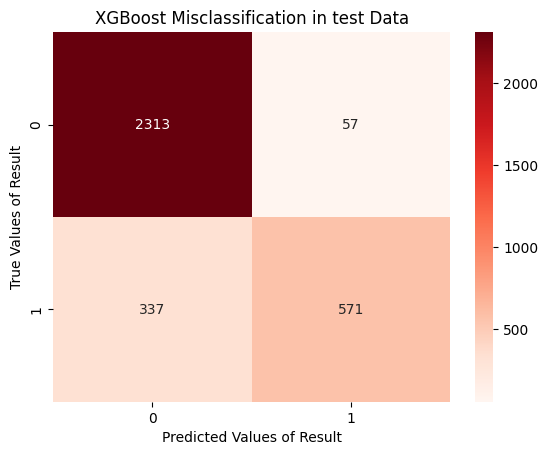

In [20]:
ax=snsparam.heatmap(confusion_matrix(y_test,pred_xg),annot=True,fmt="d",cmap="Reds") 

ax.set_ylim(2.0, 0)  

  

pltparam.title("XGBoost Misclassification in test Data") 

pltparam.ylabel("True Values of Result") 

pltparam.xlabel("Predicted Values of Result") 

print(classification_report(y_test,pred_xg)) 

In [38]:
pred_xg=xgb.predict(X_test)

In [39]:
pred_prob_xgb_tr=xgb.predict_proba(X_train)[::,1]
pred_prob_xgb_val=xgb.predict_proba(X_test)[::,1]

In [40]:
auc_score_xg = roc_auc_score(y_train, pred_prob_xgb_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_xg))
auc_score_xg = roc_auc_score(y_train, pred_prob_xgb_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_xg))

AUC score in train data is : 0.9425
AUC score in train data is : 0.9425


Text(0.5, 23.52222222222222, 'Predicted Values of Result')

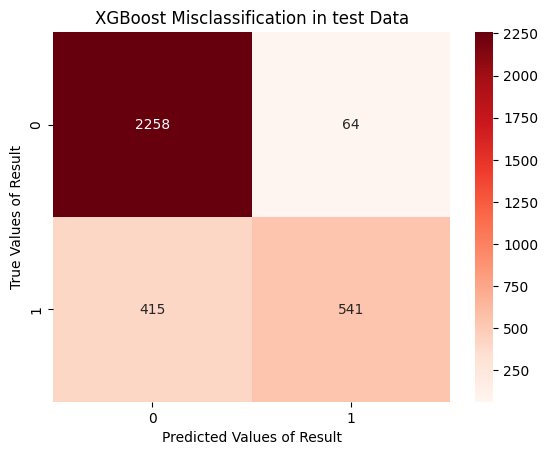

In [41]:
#confusion matrix
ax=sns.heatmap(confusion_matrix(y_test,pred_xg),annot=True,fmt="d",cmap="Reds")
ax.set_ylim(2.0, 0) 

plt.title("XGBoost Misclassification in test Data")
plt.ylabel("True Values of Result")
plt.xlabel("Predicted Values of Result")

In [42]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

           1       0.84      0.97      0.90      2322
           2       0.89      0.57      0.69       956

    accuracy                           0.85      3278
   macro avg       0.87      0.77      0.80      3278
weighted avg       0.86      0.85      0.84      3278



### Decision Tree Classifier

0.08566379989497364 seconds
AUC score in train data is : 1.0000
AUC score in train data is : 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2370
           2       1.00      1.00      1.00       908

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



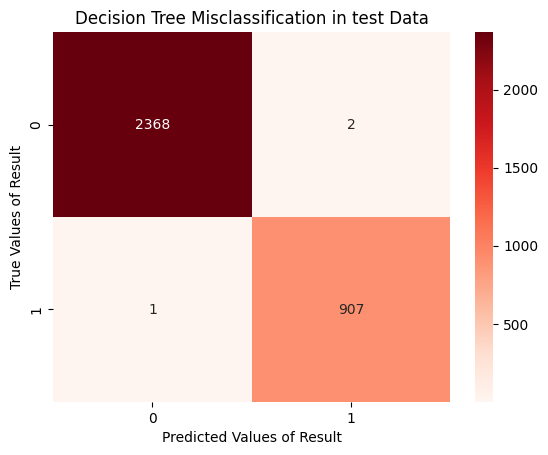

In [21]:
from sklearn.tree import DecisionTreeClassifier 

dtc=DecisionTreeClassifier() 

time_beg = time. perf_counter () 

dtc.fit(X_train,y_train) 

print(time. perf_counter () - time_beg, "seconds") 

pred_dt=dtc.predict(X_test) 

pred_prob_dt_tr=dtc.predict_proba(X_train)[::,1] 

pred_prob_dt_val=dtc.predict_proba(X_test)[::,1] 

auc_score_dt = roc_auc_score(y_train, pred_prob_dt_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_dt)) 

auc_score_dt = roc_auc_score(y_train, pred_prob_dt_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_dt)) 

#confusion matrix 

ax=snsparam.heatmap(confusion_matrix(y_test,pred_dt),annot=True,fmt="d",cmap="Reds") 

ax.set_ylim(2.0, 0)  

  

pltparam.title("Decision Tree Misclassification in test Data") 

pltparam.ylabel("True Values of Result") 

pltparam.xlabel("Predicted Values of Result") 

print(classification_report(y_test,pred_dt)) 

In [44]:
time_beg = time.perf_counter()
dt.fit(X_train,y_train)
print(time.perf_counter() - time_beg, "seconds")

0.06646279996493831 seconds


In [45]:
pred_dt=dt.predict(X_test)

In [46]:
pred_prob_dt_tr=dt.predict_proba(X_train)[::,1]
pred_prob_dt_val=dt.predict_proba(X_test)[::,1]

In [47]:
auc_score_dt = roc_auc_score(y_train, pred_prob_dt_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_dt))
auc_score_dt = roc_auc_score(y_train, pred_prob_dt_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_dt))

AUC score in train data is : 1.0000
AUC score in train data is : 1.0000


Text(0.5, 23.52222222222222, 'Predicted Values of Result')

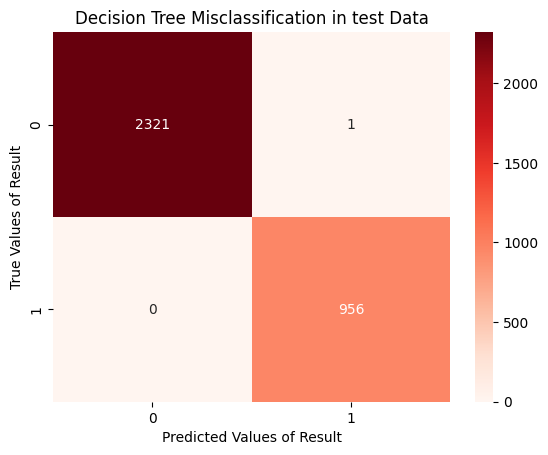

In [48]:
#confusion matrix
ax=sns.heatmap(confusion_matrix(y_test,pred_dt),annot=True,fmt="d",cmap="Reds")
ax.set_ylim(2.0, 0) 

plt.title("Decision Tree Misclassification in test Data")
plt.ylabel("True Values of Result")
plt.xlabel("Predicted Values of Result")

In [49]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2322
           2       1.00      1.00      1.00       956

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



### Bagging Classifier

0.37477660016156733 seconds
AUC score in train data is : 1.0000
AUC score in train data is : 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2370
           2       1.00      1.00      1.00       908

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



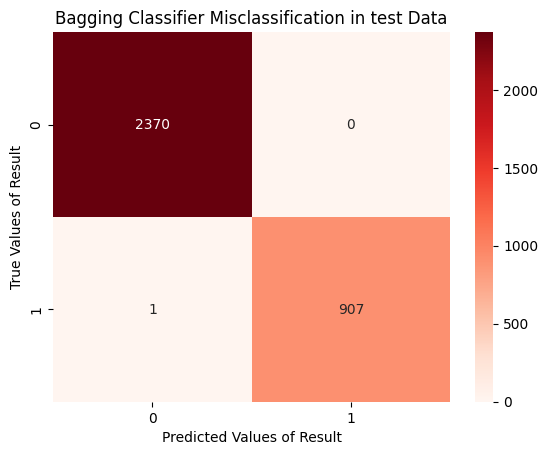

In [22]:
from sklearn.ensemble import BaggingClassifier 

bgc=BaggingClassifier() 

time_beg = time. perf_counter () 

bgc.fit(X_train,y_train) 

print(time. perf_counter () - time_beg, "seconds") 

pred_bg=bgc.predict(X_test) 

pred_prob_bg_tr=bgc.predict_proba(X_train)[::,1] 

pred_prob_bg_val=bgc.predict_proba(X_test)[::,1] 

auc_score_bg = roc_auc_score(y_train, pred_prob_bg_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_bg)) 

auc_score_bg = roc_auc_score(y_train, pred_prob_bg_tr) 

print('AUC score in train data is : {:.4f}'.format(auc_score_bg)) 

#confusion matrix 

ax=snsparam.heatmap(confusion_matrix(y_test,pred_bg),annot=True,fmt="d",cmap="Reds") 

ax.set_ylim(2.0, 0)  

  

pltparam.title("Bagging Classifier Misclassification in test Data") 

pltparam.ylabel("True Values of Result") 

pltparam.xlabel("Predicted Values of Result") 

print(classification_report(y_test,pred_bg)) 

In [51]:
time_beg = time.perf_counter()
bg.fit(X_train,y_train)
print(time.perf_counter() - time_beg, "seconds")

0.5336354000028223 seconds


In [52]:
pred_bg=bg.predict(X_test)

In [53]:
pred_prob_bg_tr=bg.predict_proba(X_train)[::,1]
pred_prob_bg_val=bg.predict_proba(X_test)[::,1]

In [54]:
auc_score_bg = roc_auc_score(y_train, pred_prob_bg_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_bg))
auc_score_bg = roc_auc_score(y_train, pred_prob_bg_tr)
print('AUC score in train data is : {:.4f}'.format(auc_score_bg))

AUC score in train data is : 1.0000
AUC score in train data is : 1.0000


Text(0.5, 23.52222222222222, 'Predicted Values of Result')

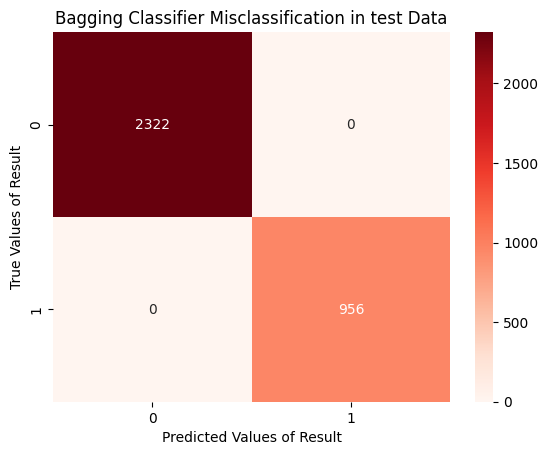

In [55]:
#confusion matrix
ax=sns.heatmap(confusion_matrix(y_test,pred_bg),annot=True,fmt="d",cmap="Reds")
ax.set_ylim(2.0, 0) 

plt.title("Bagging Classifier Misclassification in test Data")
plt.ylabel("True Values of Result")
plt.xlabel("Predicted Values of Result")

In [56]:
print(classification_report(y_test,pred_bg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2322
           2       1.00      1.00      1.00       956

    accuracy                           1.00      3278
   macro avg       1.00      1.00      1.00      3278
weighted avg       1.00      1.00      1.00      3278



### Feature Selection

In [23]:
from sklearn.feature_selection import mutual_info_classif 

feat_dis = X.dtypes == int 

In [27]:
imp_feat_scores = mutual_info_classif(X, y, discrete_features=feat_dis) 

imp_feat_scores = pdparam.Series(imp_feat_scores, name='MI Scores', index=X.columns) 

imp_feat_scores = imp_feat_scores.sort_values(ascending=False) 

imp_feat_scores 

In [28]:
def feat_imp(scores): 

    scores = scores.sort_values(ascending=True) #sort from high importance to low 

    width = npparam.arange(len(scores)) 

    ticks = list(scores.index) 

    pltparam.barh(width, scores) 

    pltparam.yticks(width, ticks) 

    pltparam.title("Feature Importance based on Mutual Information Score") 

In [60]:
import graphviz
import pydot
from sklearn.tree import export_graphviz

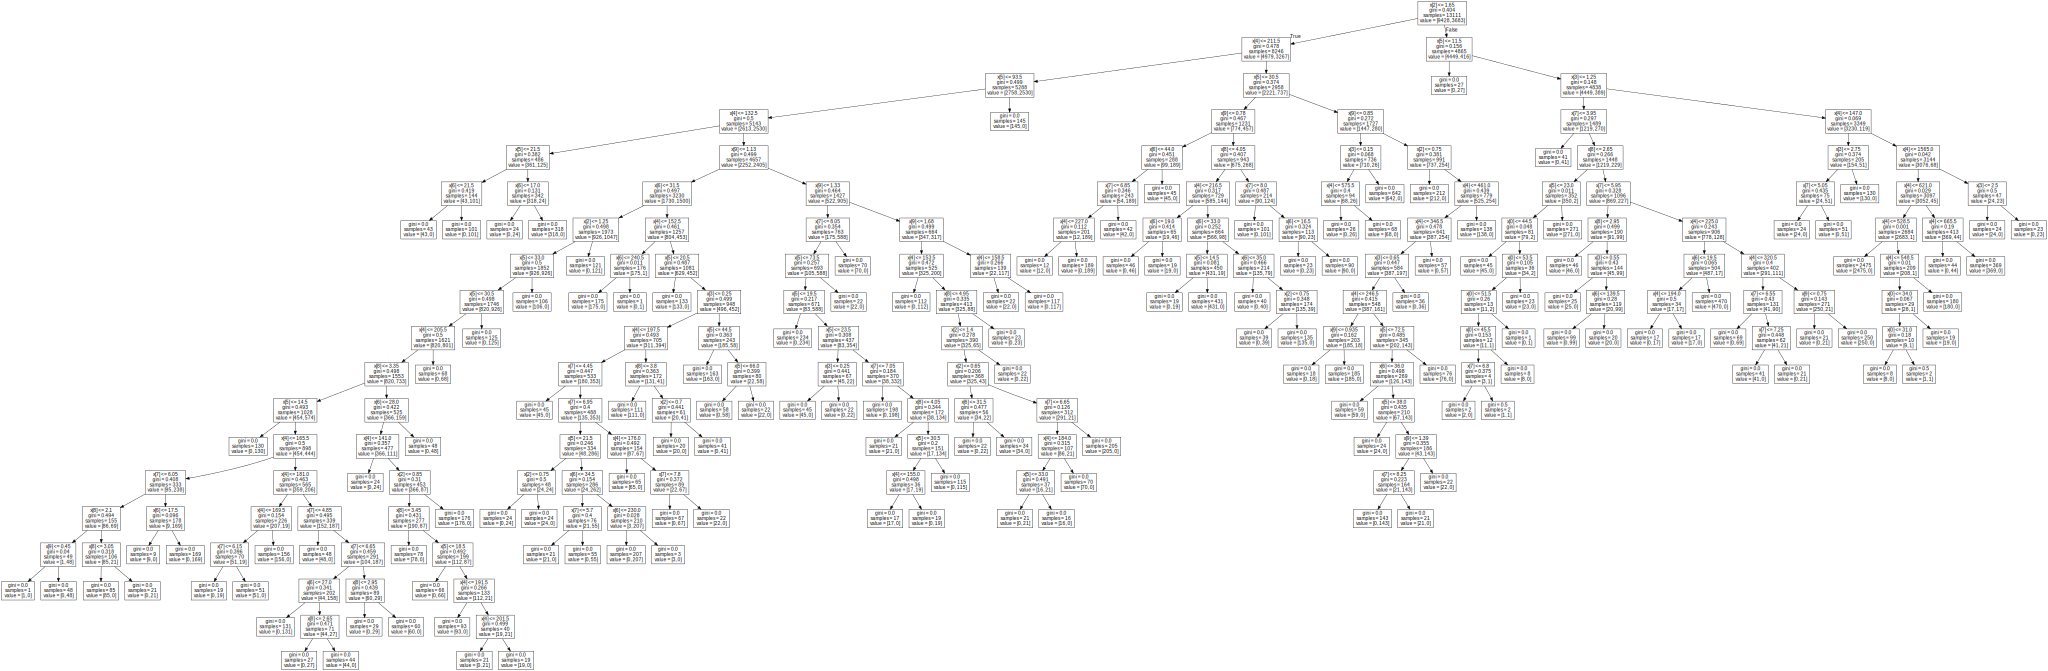

In [71]:
#dotfile = open("C:/Users/91989/Desktop/dtree2.dot", 'w')
#dot_data = export_graphviz(dt, out_file=dotfile)
#(graph,) = pydot.graph_from_dot_file('C:/Users/91989/Desktop/dtree2.dot')
#graph.write_png('C:/Users/91989/Desktop/somefile.png')
dot_data = export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph